In [1]:
from pyspark.sql import SparkSession 
# Create Spark Session
spark = SparkSession.builder.master("local[1]").appName("https://mfu.ac.th/").getOrCreate()

# Read data from the vehicle_stolen_dataset.csv 
#df = spark.createDataFrame([[0, 33.3, -17.5],
#                              [1, 40.4, -20.5],
#                              [2, 28., -23.9],
#                              [3, 29.5, -19.0],
#                              [4, 32.8, -18.84]
#                             ], ["other","lat", "long"]) 
# Input Dataset
# A1(2,10), A2(2,5), A3(8,4), A4(5,8), A5(7,5), A6(6,4), A7(1,2), A8(4,9). 

df = spark.createDataFrame([[0, 2, 10],
                              [1, 2, 5],
                              [2, 8, 4],
                              [3, 5, 8],
                              [4, 7, 5],
                            [5, 6, 4],
                            [6, 1, 2],
                            [7, 4, 9],
                             ], ["other","X", "Y"]) 


In [2]:
df.show()

+-----+---+---+
|other|  X|  Y|
+-----+---+---+
|    0|  2| 10|
|    1|  2|  5|
|    2|  8|  4|
|    3|  5|  8|
|    4|  7|  5|
|    5|  6|  4|
|    6|  1|  2|
|    7|  4|  9|
+-----+---+---+



In [3]:
#  assemble your features
from pyspark.ml.feature import VectorAssembler

vecAssembler = VectorAssembler(inputCols=["X", "Y"], outputCol="features")
new_df = vecAssembler.transform(df)

In [4]:
new_df.show()

+-----+---+---+----------+
|other|  X|  Y|  features|
+-----+---+---+----------+
|    0|  2| 10|[2.0,10.0]|
|    1|  2|  5| [2.0,5.0]|
|    2|  8|  4| [8.0,4.0]|
|    3|  5|  8| [5.0,8.0]|
|    4|  7|  5| [7.0,5.0]|
|    5|  6|  4| [6.0,4.0]|
|    6|  1|  2| [1.0,2.0]|
|    7|  4|  9| [4.0,9.0]|
+-----+---+---+----------+



In [5]:
# fit into KMeans model
from pyspark.ml.clustering import KMeans

kmeans = KMeans(k=3, seed=1)  # 3 clusters here
model = kmeans.fit(new_df.select('features'))

In [6]:
#  transform the initial dataframe to include cluster assignments
transformed = model.transform(new_df)
transformed.show()  

+-----+---+---+----------+----------+
|other|  X|  Y|  features|prediction|
+-----+---+---+----------+----------+
|    0|  2| 10|[2.0,10.0]|         1|
|    1|  2|  5| [2.0,5.0]|         2|
|    2|  8|  4| [8.0,4.0]|         0|
|    3|  5|  8| [5.0,8.0]|         1|
|    4|  7|  5| [7.0,5.0]|         0|
|    5|  6|  4| [6.0,4.0]|         0|
|    6|  1|  2| [1.0,2.0]|         2|
|    7|  4|  9| [4.0,9.0]|         1|
+-----+---+---+----------+----------+



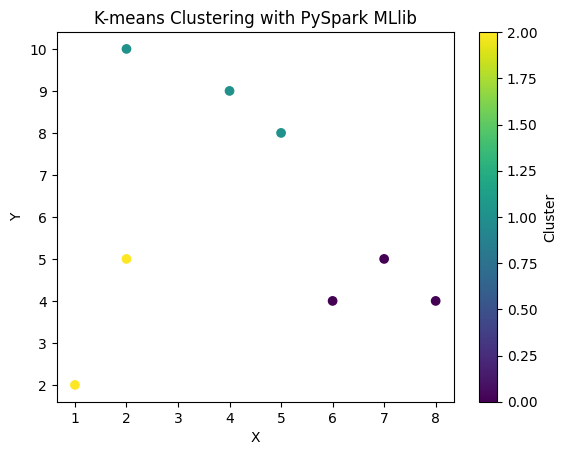

In [7]:
# Visualizing the Results
import matplotlib.pyplot as plt
import pandas as pd
# Converting to Pandas DataFrame
clustered_data_pd = transformed.toPandas()

# Plot the results
plt.scatter(clustered_data_pd["X"], clustered_data_pd["Y"], c=clustered_data_pd["prediction"], cmap='viridis')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("K-means Clustering with PySpark MLlib")
plt.colorbar().set_label("Cluster")
plt.show()